In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# Choose a dataset
data = pd.read_csv('./online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


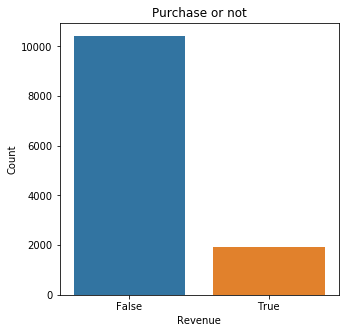

In [3]:
# Analyze the dataset

plt.subplots(figsize=(5, 5))

# Purchase or not
plt.subplot(1, 1, 1)
sns.countplot(data['Revenue'])
plt.title('Purchase or not')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.show()

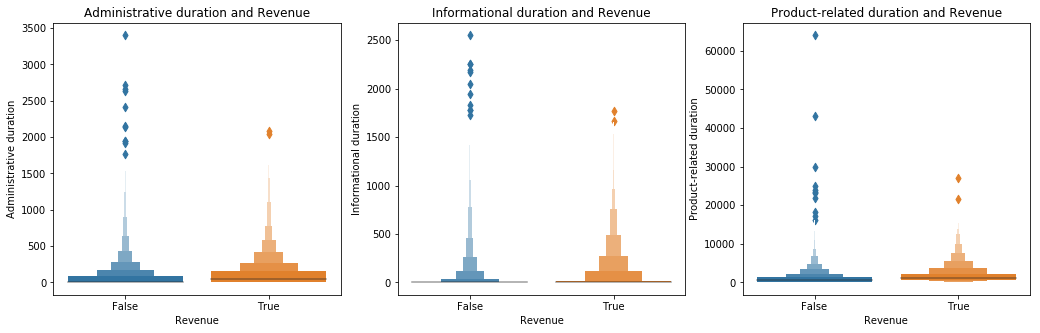

In [4]:
# Analyze the dataset

plt.subplots(figsize=(17.5, 5))

# Administrative duration and Revenue
plt.subplot(1, 3, 1)
sns.boxenplot(data['Revenue'], data['Administrative_Duration'])
plt.title('Administrative duration and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Administrative duration')

# Informational duration and Revenue
plt.subplot(1, 3, 2)
sns.boxenplot(data['Revenue'], data['Informational_Duration'])
plt.title('Informational duration and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Informational duration')

# Product-related duration and Revenue
plt.subplot(1, 3, 3)
sns.boxenplot(data['Revenue'], data['ProductRelated_Duration'])
plt.title('Product-related duration and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product-related duration')

plt.show()

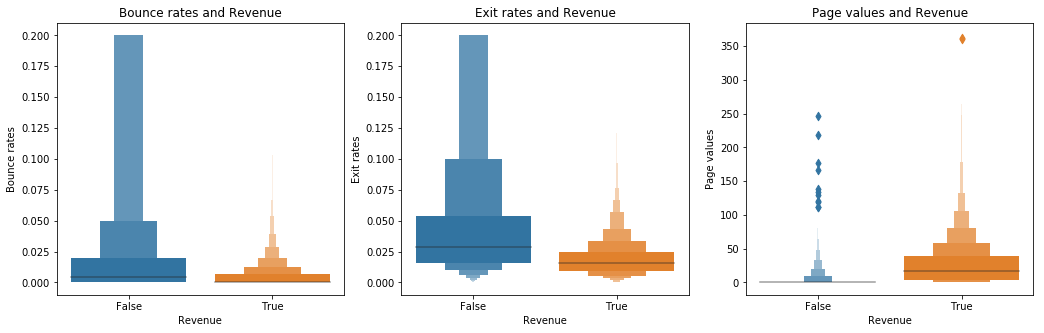

In [5]:
# Analyze the dataset

plt.subplots(figsize=(17.5, 5))

# Bounce rates and Revenue
plt.subplot(1, 3, 1)
sns.boxenplot(data['Revenue'], data['BounceRates'])
plt.title('Bounce rates and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Bounce rates')

# Exit rates and Revenue
plt.subplot(1, 3, 2)
sns.boxenplot(data['Revenue'], data['ExitRates'])
plt.title('Exit rates and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Exit rates')

# Page values and Revenue
plt.subplot(1, 3, 3)
sns.boxenplot(data['Revenue'], data['PageValues'])
plt.title('Page values and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Page values')

plt.show()

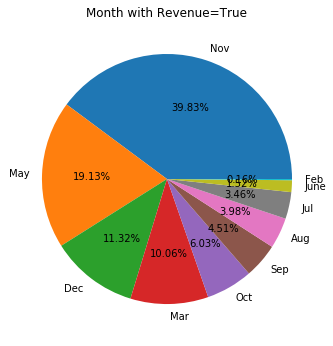

In [6]:
# Analyze the dataset

plt.subplots(figsize=(5.75, 5.75))

# Month with Revenue=True
plt.subplot(1, 1, 1)
plt.pie(data[data['Revenue'] == True]['Month'].value_counts().tolist(),
        labels = data[data['Revenue'] == True]['Month'].value_counts().index.tolist(),
        autopct = '%.2f%%')
plt.title('Month with Revenue=True')

plt.show()

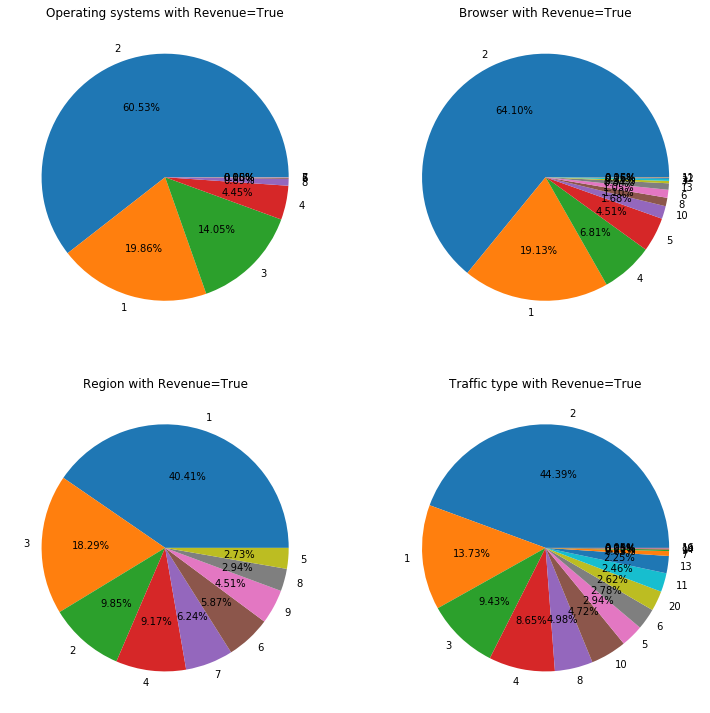

In [7]:
# Analyze the dataset

plt.subplots(figsize=(12.5, 12.5))

# Operating systems with Revenue=True
plt.subplot(2, 2, 1)
plt.pie(data[data['Revenue'] == True]['OperatingSystems'].value_counts().tolist(),
        labels = data[data['Revenue'] == True]['OperatingSystems'].value_counts().index.tolist(),
        autopct = '%.2f%%')
plt.title('Operating systems with Revenue=True')

# Browser with Revenue=True
plt.subplot(2, 2, 2)
plt.pie(data[data['Revenue'] == True]['Browser'].value_counts().tolist(),
        labels = data[data['Revenue'] == True]['Browser'].value_counts().index.tolist(),
        autopct = '%.2f%%')
plt.title('Browser with Revenue=True')

# Region with Revenue=True
plt.subplot(2, 2, 3)
plt.pie(data[data['Revenue'] == True]['Region'].value_counts().tolist(),
        labels = data[data['Revenue'] == True]['Region'].value_counts().index.tolist(),
        autopct = '%.2f%%')
plt.title('Region with Revenue=True')

# Traffic type with Revenue=True
plt.subplot(2, 2, 4)
plt.pie(data[data['Revenue'] == True]['TrafficType'].value_counts().tolist(),
        labels = data[data['Revenue'] == True]['TrafficType'].value_counts().index.tolist(),
        autopct = '%.2f%%')
plt.title('Traffic type with Revenue=True')

plt.show()

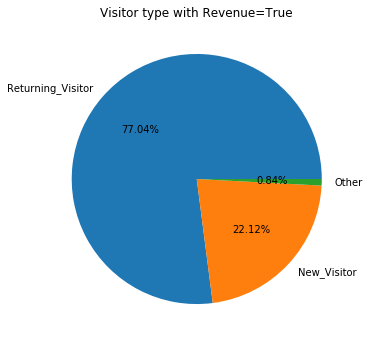

In [8]:
# Analyze the dataset

plt.subplots(figsize=(5.75, 5.75))

# Visitor type with Revenue=True
plt.subplot(1, 1, 1)
plt.pie(data[data['Revenue'] == True]['VisitorType'].value_counts().tolist(),
        labels = data[data['Revenue'] == True]['VisitorType'].value_counts().index.tolist(),
        autopct = '%.2f%%')
plt.title('Visitor type with Revenue=True')

plt.show()

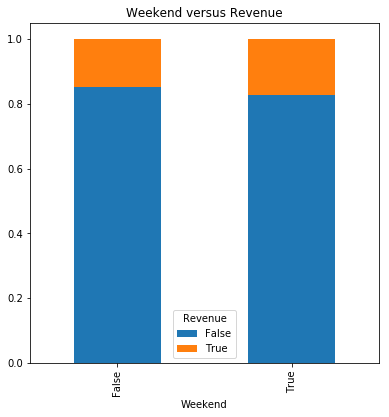

In [9]:
# Analyze the dataset

# Weekend versus Revenue
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6.25, 6.25))
plt.title('Weekend versus Revenue')

plt.show()

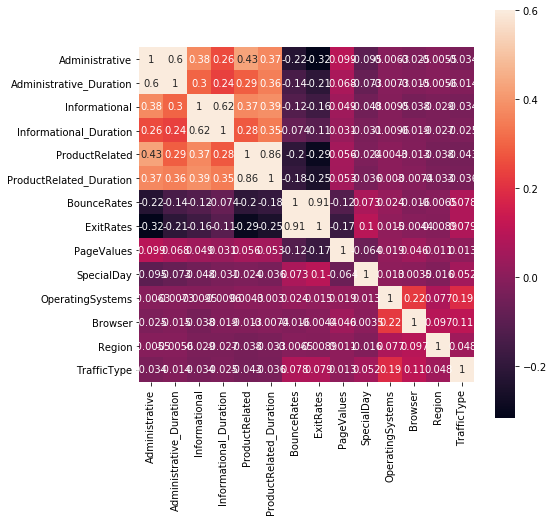

In [10]:
# Analyze the dataset

plt.subplots(figsize=(7.5, 7.5))

# Correlation
sns.heatmap(data.drop(columns=['Month', 'VisitorType', 'Weekend', 'Revenue']).corr(), vmax=0.6, square=True, annot=True)

In [11]:
# Preprocess the dataset

data.loc[data['Month'] == 'Jan', 'Month'] = 1
data.loc[data['Month'] == 'Feb', 'Month'] = 2
data.loc[data['Month'] == 'Mar', 'Month'] = 3
data.loc[data['Month'] == 'Apr', 'Month'] = 4
data.loc[data['Month'] == 'May', 'Month'] = 5
data.loc[data['Month'] == 'June', 'Month'] = 6
data.loc[data['Month'] == 'Jul', 'Month'] = 7
data.loc[data['Month'] == 'Aug', 'Month'] = 8
data.loc[data['Month'] == 'Sep', 'Month'] = 9
data.loc[data['Month'] == 'Oct', 'Month'] = 10
data.loc[data['Month'] == 'Nov', 'Month'] = 11
data.loc[data['Month'] == 'Dec', 'Month'] = 12

data.loc[data['VisitorType'] == 'Returning_Visitor', 'VisitorType'] = 1
data.loc[data['VisitorType'] == 'New_Visitor', 'VisitorType'] = 2
data.loc[data['VisitorType'] == 'Other', 'VisitorType'] = 3

data.loc[data['Weekend'] == True, 'Weekend'] = 1
data.loc[data['Weekend'] == False, 'Weekend'] = 0

data.loc[data['Revenue'] == True, 'Revenue'] = 1
data.loc[data['Revenue'] == False, 'Revenue'] = 0

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [12]:
# Divide the dataset into training data and testing data
const = int(0.8 * data.shape[0])
train_data = data[:const]
test_data = data[const:]
print('Training data:', train_data.shape[0], 'rows and', train_data.shape[1], 'cols.')
print('Testing data:', test_data.shape[0], 'rows and', test_data.shape[1], 'cols.')

Training data: 9864 rows and 18 cols.
Testing data: 2466 rows and 18 cols.


In [13]:
# Define Predictor/Independent Variables
x_train = train_data.loc[:, train_data.columns != 'Revenue']
x_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1


In [14]:
# Define Predictor/Independent Variables
x_test = test_data.loc[:, test_data.columns != 'Revenue']
x_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
9864,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,12,2,2,3,1,3,1
9865,1,4.0,0,0.0,22,1749.000000,0.000000,0.015000,0.0,0.0,12,2,2,3,10,1,0
9866,0,0.0,0,0.0,7,140.458333,0.028571,0.034286,0.0,0.0,11,3,3,9,2,1,0
9867,0,0.0,0,0.0,37,698.541667,0.003810,0.015238,0.0,0.0,11,2,2,6,11,1,0
9868,2,76.5,0,0.0,10,123.229167,0.022857,0.059444,0.0,0.0,12,1,2,1,10,1,0


In [15]:
# Define Target/Dependent Variable
y_train = train_data['Revenue']
print(y_train)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9834    0
9835    0
9836    0
9837    1
9838    1
9839    0
9840    0
9841    0
9842    0
9843    1
9844    0
9845    1
9846    0
9847    0
9848    0
9849    1
9850    0
9851    0
9852    0
9853    0
9854    1
9855    0
9856    0
9857    0
9858    0
9859    0
9860    0
9861    0
9862    0
9863    0
Name: Revenue, Length: 9864, dtype: int64


In [16]:
# Define Target/Dependent Variable
y_test = test_data['Revenue']
print(y_test)

9864     0
9865     0
9866     0
9867     0
9868     0
9869     0
9870     0
9871     0
9872     0
9873     1
9874     1
9875     0
9876     1
9877     0
9878     0
9879     1
9880     0
9881     0
9882     0
9883     1
9884     0
9885     0
9886     0
9887     1
9888     0
9889     0
9890     0
9891     0
9892     0
9893     1
        ..
12300    0
12301    0
12302    0
12303    0
12304    0
12305    0
12306    0
12307    0
12308    0
12309    0
12310    0
12311    1
12312    1
12313    1
12314    0
12315    0
12316    0
12317    0
12318    0
12319    0
12320    0
12321    0
12322    0
12323    0
12324    0
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 2466, dtype: int64


In [17]:
# Fit the Model
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)

C:\Users\LinYunChen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [18]:
# Predict Class
predict_class = model.predict(x_test)
print(predict_class)

[0 0 0 ... 0 0 0]


In [19]:
# Predict Probability
predict_prob = model.predict_proba(x_test)
print(predict_prob)

[[0.95791867 0.04208133]
 [0.9264474  0.0735526 ]
 [0.98277077 0.01722923]
 ...
 [0.94433239 0.05566761]
 [0.92221369 0.07778631]
 [0.95605943 0.04394057]]


In [20]:
# Evaluate
predict_acc = model.score(x_test, y_test)
print(predict_acc)

0.8337388483373885
